In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("city_attributes.csv")
data

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


In [3]:
data.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [4]:
data.tail()

,City,Country,Latitude,Longitude
31,Tel Aviv District,Israel,32.083328,34.799999
32,Eilat,Israel,29.558050,34.948212
33,Haifa,Israel,32.815559,34.989170
34,Nahariyya,Israel,33.005859,35.094090
35,Jerusalem,Israel,31.769039,35.216331


In [5]:
data.shape

(36, 4)

In [6]:
data.columns

Index(['City', 'Country', 'Latitude', 'Longitude'], dtype='object')

In [7]:
data.isnull().sum()

City         0
Country      0
Latitude     0
Longitude    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       36 non-null     object 
 1   Country    36 non-null     object 
 2   Latitude   36 non-null     float64
 3   Longitude  36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


In [9]:
data.duplicated().sum()

0

In [10]:
data.dtypes

City          object
Country       object
Latitude     float64
Longitude    float64
dtype: object

In [11]:
data["Country"].value_counts()

United States    27
Israel            6
Canada            3
Name: Country, dtype: int64

In [12]:
data["City"].value_counts()

Vancouver            1
Portland             1
Detroit              1
Jacksonville         1
Charlotte            1
Miami                1
Pittsburgh           1
Toronto              1
Philadelphia         1
New York             1
Montreal             1
Boston               1
Beersheba            1
Tel Aviv District    1
Eilat                1
Haifa                1
Nahariyya            1
Atlanta              1
Indianapolis         1
Nashville            1
Albuquerque          1
San Francisco        1
Seattle              1
Los Angeles          1
San Diego            1
Las Vegas            1
Phoenix              1
Denver               1
Chicago              1
San Antonio          1
Dallas               1
Houston              1
Kansas City          1
Minneapolis          1
Saint Louis          1
Jerusalem            1
Name: City, dtype: int64

In [13]:
data.describe()

,Latitude,Longitude
count,36.000000,36.000000
mean,37.066743,-73.544668
std,5.815514,51.612349
min,25.774269,-123.119339
25%,32.766126,-105.401312
50%,36.170429,-86.471241
75%,40.998211,-74.874332
max,49.249660,35.216331


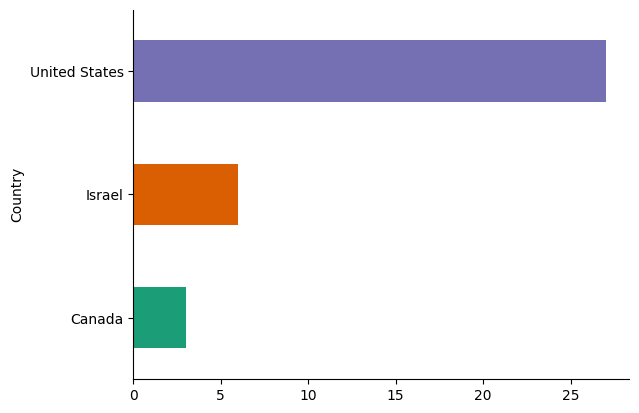

In [14]:
data.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

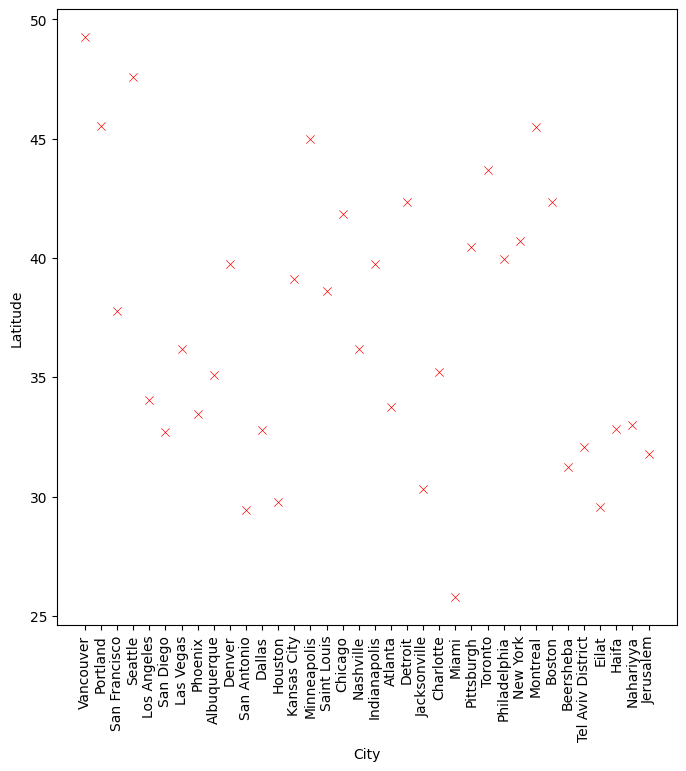

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data,x='City',y='Latitude', marker="x", color="red")
plt.xticks(rotation=90)
plt.show()

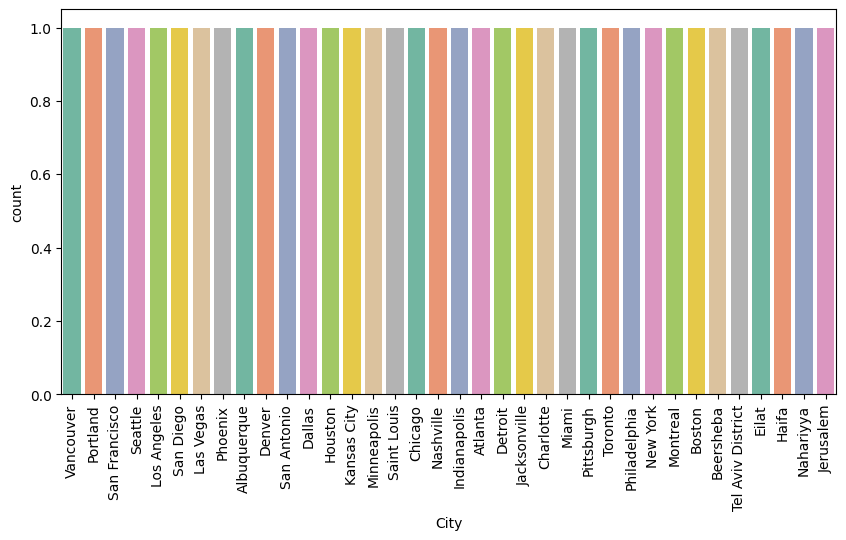

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='City',hue='City', palette='Set2')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Longitude', ylabel='Density'>

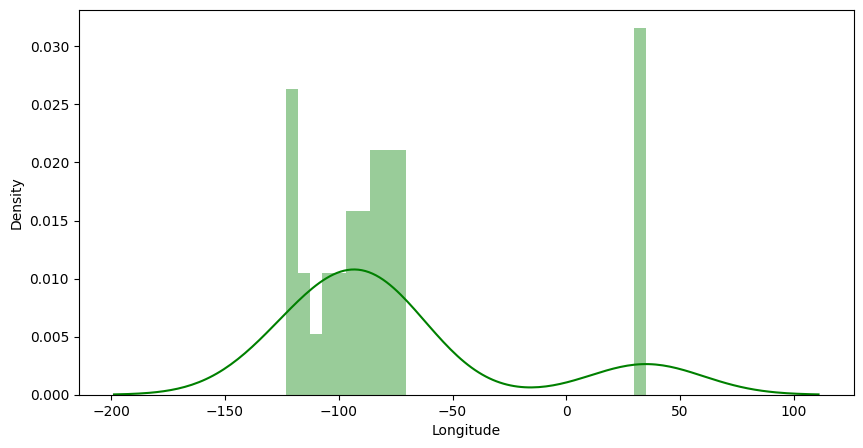

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(data['Longitude'], bins=30, color='green')

<Axes: xlabel='Latitude', ylabel='Density'>

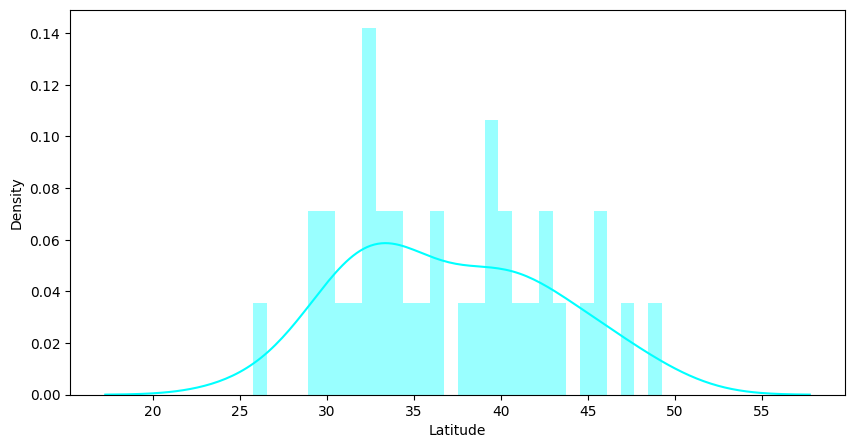

In [18]:
plt.figure(figsize=(10, 5))
sns.distplot(data['Latitude'], bins=30, color='cyan')

<Axes: xlabel='Country', ylabel='Latitude'>

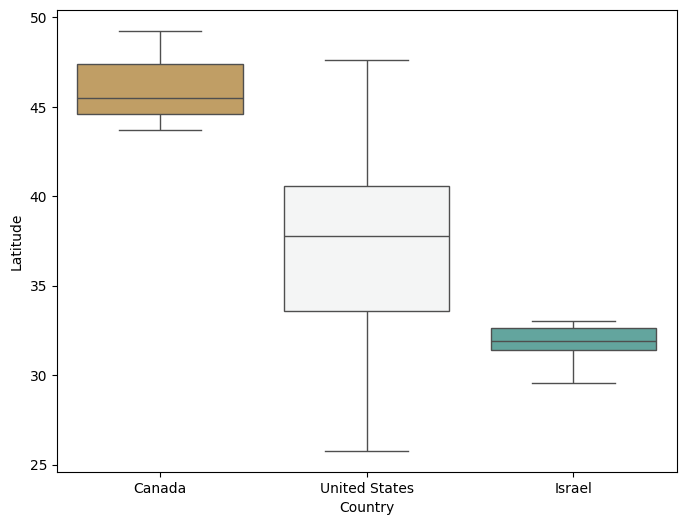

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Country', y='Latitude', palette="BrBG")

In [20]:
fig = px.scatter_geo(data, lat="Latitude", lon="Longitude", color='City',hover_name="City")
fig.show()

<Axes: xlabel='Country', ylabel='Longitude'>

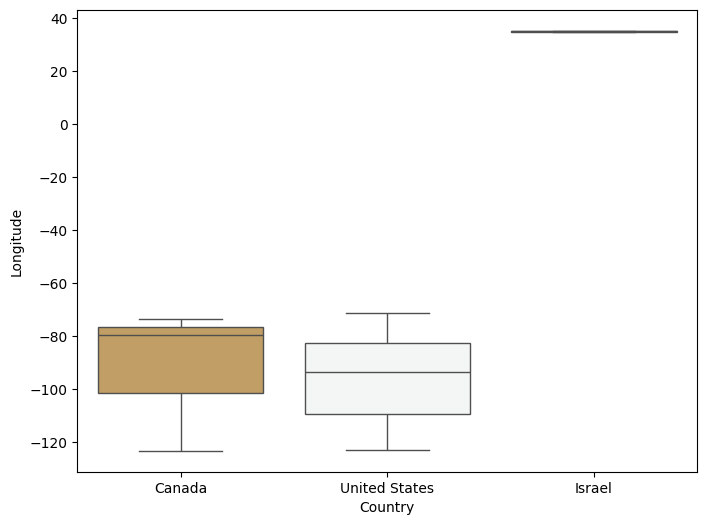

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Country', y='Longitude', palette="BrBG")

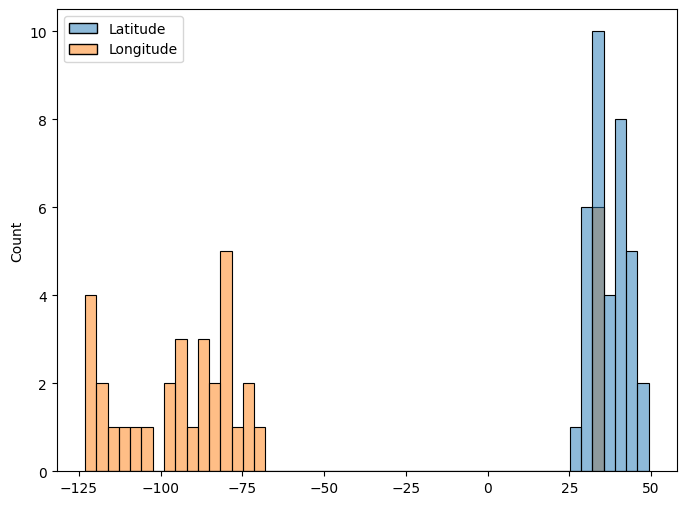

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, bins=50)
plt.show()

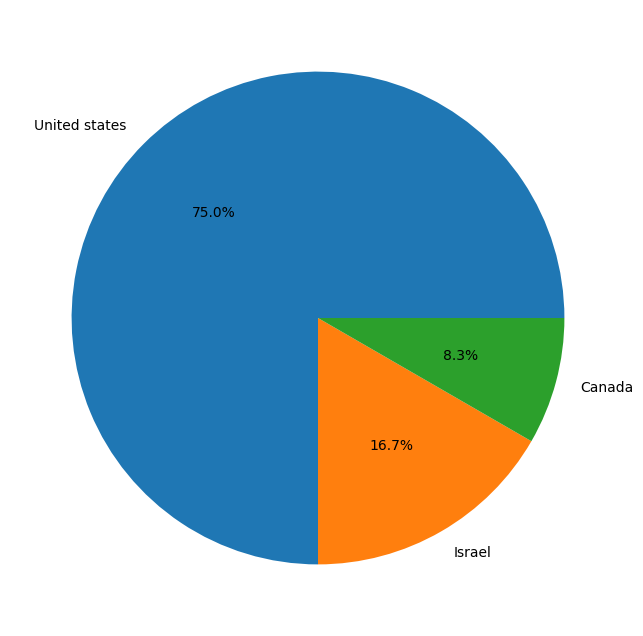

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(data['Country'].value_counts(),labels=["United states","Israel","Canada"],autopct='%1.1f%%')
plt.ylabel("",fontsize=30)
plt.show()

<Axes: xlabel='Country', ylabel='Longitude'>

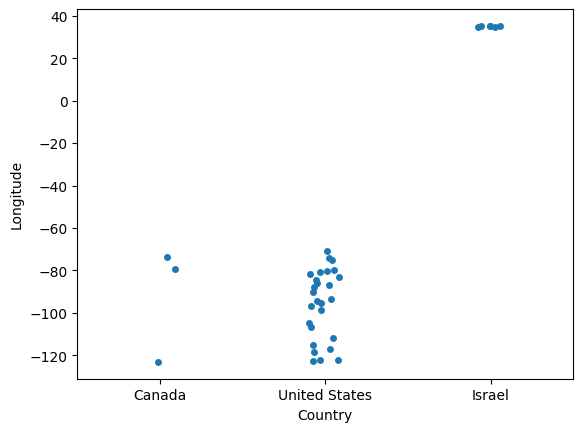

In [24]:
sns.stripplot(x=data["Country"], y=data["Longitude"])

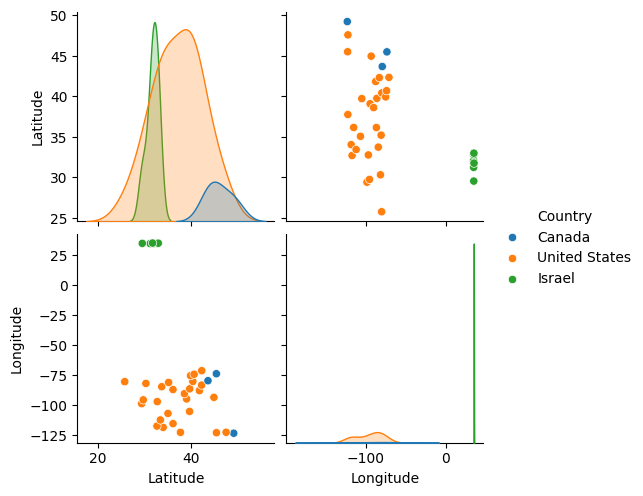

In [25]:
sns.pairplot(data, hue="Country")

In [26]:
data.corr()

,Latitude,Longitude
Latitude,1.000000,-0.413014
Longitude,-0.413014,1.000000


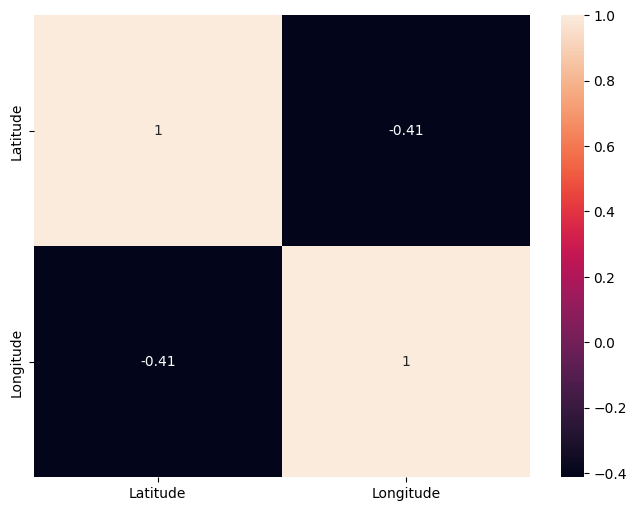

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()